# 1. 데이터 전처리


In [ ]:
# 정규표현식 기반 문장 분리 but kss는 용량 너무 큼
import re
import pandas as pd

def split_sentences(text):
    # 예외처리된 분리 로직
    pattern = re.compile(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s+')
    return pattern.split(text)

# 적용
with open("/Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/채만식-태평천하.txt", "r", encoding="utf-8") as f:
    text = f.read()

sentences = split_sentences(text)

# 저장
df = pd.DataFrame({"문장번호": range(1, len(sentences)+1), "문장내용": sentences})
df.to_csv("/Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/태평천하_문장분리결과.csv", index=False, encoding="utf-8-sig")

print(f"총 {len(sentences)}문장 분리 완료 및 저장됨.")


총 2455문장 분리 완료 및 저장됨.


정규표현식 간단하지만 문장 구분이 세부적이지 않아서 로직 수정해야 될듯 


In [2]:
# 문장 분리 함수 (정규표현식 + 쉼표 분리 포함)
def split_sentences_with_commas(text):
    # 마침표, 느낌표, 물음표 기준 정규표현식 분리
    sentence_pattern = re.compile(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s+')
    base_sentences = sentence_pattern.split(text)

    # 쉼표가 1개 이상 있는 문장은 쉼표 기준 추가 분리
    refined_sentences = []
    for sent in base_sentences:
        if ',' in sent:
            parts = [s.strip() for s in sent.split(",") if s.strip()]
            refined_sentences.extend(parts)
        else:
            refined_sentences.append(sent.strip())

    return refined_sentences

# 텍스트 불러오기
with open("/Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/채만식-태평천하.txt", "r", encoding="utf-8") as f:
    full_text = f.read()

# 문장 분리 실행
sentences = split_sentences_with_commas(full_text)

# 결과 저장
df = pd.DataFrame({"문장번호": range(1, len(sentences) + 1), "문장내용": sentences})
save_path = "/Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/태평천하_문장분리결과_쉼표포함.csv"
df.to_csv(save_path, index=False, encoding="utf-8-sig")

print(f"문장 분리 완료: 총 {len(sentences)}문장")
print(f"저장 경로: {save_path}")


문장 분리 완료: 총 5750문장
저장 경로: /Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/태평천하_문장분리결과_쉼표포함.csv


나쁘지 않다 이제 형태소 분석 해보자 

형태소 분석 테스트


In [3]:
from konlpy.tag import Okt

input_path = "/Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/태평천하_문장분리결과_쉼표포함.csv"
save_path = "//Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/태평천하_Okt형태소분석결과.csv"

# 데이터 
df = pd.read_csv(input_path)

# Okt 형태소 분석기 준비
okt = Okt()

# 분석 결과 저장용 컬럼 
df["형태소(품사)"] = df["문장내용"].apply(lambda x: okt.pos(str(x), stem=True))
df["형태소(단어만)"] = df["형태소(품사)"].apply(lambda pos: [w for w, p in pos if p in ["Noun", "Adjective", "Verb"]])

df.to_csv(save_path, index=False, encoding="utf-8-sig")

print(f"형태소 분석 완료 및 저장: {save_path}")

# 잘 됐는지 보게 상위 10개만 출력
df[["문장번호", "문장내용", "형태소(단어만)"]].head(10)


형태소 분석 완료 및 저장: //Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/태평천하_Okt형태소분석결과.csv


,문장번호,문장내용,형태소(단어만)
0,1,太 平 天 下[태평천하]\n 1.,[태평천하]
1,2,尹直員[윤직원] 영감 歸宅之圖[ 귀택 지도] 추석을 지나 이윽고 짙어가는 가을해가 ...,"[윤직, 영감, 귀택, 지도, 추석, 지나, 이윽고, 짙다, 가을, 하다, 물기, ..."
2,3,저 계동(桂洞)의 이름난 장자(富者[부자]) 윤직원(尹直員) 영감이 마침 어디 출입...,"[저, 계동, 의, 이름나다, 장자, 부자, 윤직, 영감, 마침, 어디, 출입, 하..."
3,4,간밤에 꿈을 잘못 꾸었던지,"[간밤, 꿈, 잘못, 꾸다]"
4,5,오늘 아침에 마누라하고 다툼질을 하고 나왔던지,"[오늘, 아침, 마누라, 다툼, 질, 하다, 나오다]"
5,6,아뭏든 엔간히 일수 좋지 못한 인력거꾼입니다.,"[아뭏, 엔간하다, 일수, 좋다, 못, 인력거, 이다]"
6,7,여느 평탄한 길로 끌고오기도 무던히 힘이 들었는데 골목쟁이로 들어서서는 빗밋이 경사...,"[여느, 평탄하다, 길, 끄다, 기도, 무덥다, 힘, 들다, 골목쟁이, 들어서다, ..."
7,8,엄살이 아니라 정말 혀가 나올 뻔했읍니다.,"[엄살, 아니다, 정말, 혀, 나오다, 뻔하다, 읍니]"
8,9,28관,[관]
9,10,하고도 6백 몸메!……\n 윤직원 영감의 이 체중은,"[백, 몸메, 윤직, 영감, 이, 체중]"


형태소 분석 감정(풍자 관련) 태깅

In [4]:
input_path = "/Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/태평천하_Okt형태소분석결과.csv"
save_path = "/Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/태평천하_감정유형태깅_최종.csv"

# 감정 기준 사전 (직접 만든것)
criteria = {
    "반어": [
        "고맙다", "감사하다", "참", "정말", "과연", "역시", "대단하다", "멋지다", "훌륭하다", "정중하다",
        "점잖다", "기품있다", "깨끗하다", "좋다", "잘하다", "그렇다", "그런가", "그럴까", "그럴 리", "그래",
        "기다리다", "이해하다", "감탄하다", "고맙구만", "납셨구만", "천하태평이로세", "덕분이다네", "말씀을 곱게도 하시네"
    ],
    "과장": [
        "태평하다", "넘치다", "완벽하다", "천하", "풍년이다", "굉장하다", "화려하다", "찬란하다", "거창하다",
        "엄청나다", "비현실적이다", "황홀하다", "장엄하다", "영광스럽다", "무한하다", "어마어마하다", "극진하다",
        "위대하다", "성대하다", "유난스럽다", "전대미문이다", "삼천리", "하늘이 울렸다", "만고에 없을 일"
    ],
    "대조": [
        "없다", "굶다", "양반", "싸다", "비싸다", "지나다", "달라지다", "차이나다", "변하다", "가난하다", 
        "풍요롭다", "대비되다", "뒤바뀌다", "역전되다", "낙차나다", "구분되다", "엇갈리다", "뒤섞이다", "상충하다"
    ],
    "조롱": [
        "비웃다", "비꼬다", "깔보다", "우습다", "우롱하다", "놀리다", "비하하다", "멸시하다", "헛웃음짓다",
        "코웃음치다", "허풍떨다", "속이다", "한심하다", "얄밉다", "냉소하다", "비아냥거리다", "야유하다", 
        "무시하다", "기죽이다", "영감탱이답군요", "팔자 좋으셔", "사돈 남 말 하시네", "허세 작렬이로군"
    ],
    "감탄": [
        "허허", "참", "정말", "맙소사", "어머나", "어이없다", "놀랍다", "깜짝놀라다", "얼마나", "무척", 
        "몹시", "진짜", "우와", "허참", "어찌된", "세상에", "헐", "헉", "기가 막히다", "허허 이럴 수가"
    ]
}

# 감정유형 태깅 함수
def tag_emotion(words):
    matched = []
    for tag, keywords in criteria.items():
        if any(word in keywords for word in words):
            matched.append(tag)
    return ", ".join(sorted(set(matched))) if matched else ""

def extract_keywords(words):
    result = []
    for tag, keywords in criteria.items():
        result += [w for w in words if w in keywords]
    return ", ".join(sorted(set(result)))

df = pd.read_csv(input_path)

# 감정단어 감정유형 태깅
df["감정단어"] = df["형태소(단어만)"].apply(eval).apply(extract_keywords)
df["감정유형"] = df["형태소(단어만)"].apply(eval).apply(tag_emotion)

# 저장
df.to_csv(save_path, index=False, encoding="utf-8-sig")
print(f"감정유형 태깅 완료 및 저장: {save_path}")


감정유형 태깅 완료 및 저장: /Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/태평천하_감정유형태깅_최종.csv


# 2. 간단한 데이터 탐색


현재 시점 : 형태소 분석 -> 풍자(감정유형)의 종류도 태깅 완료 이제는 감정 유형 분포 확인

시점별 감정유형 분석 완료
결과 CSV 저장: /Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/태평천하_시점별_감정유형분포.csv


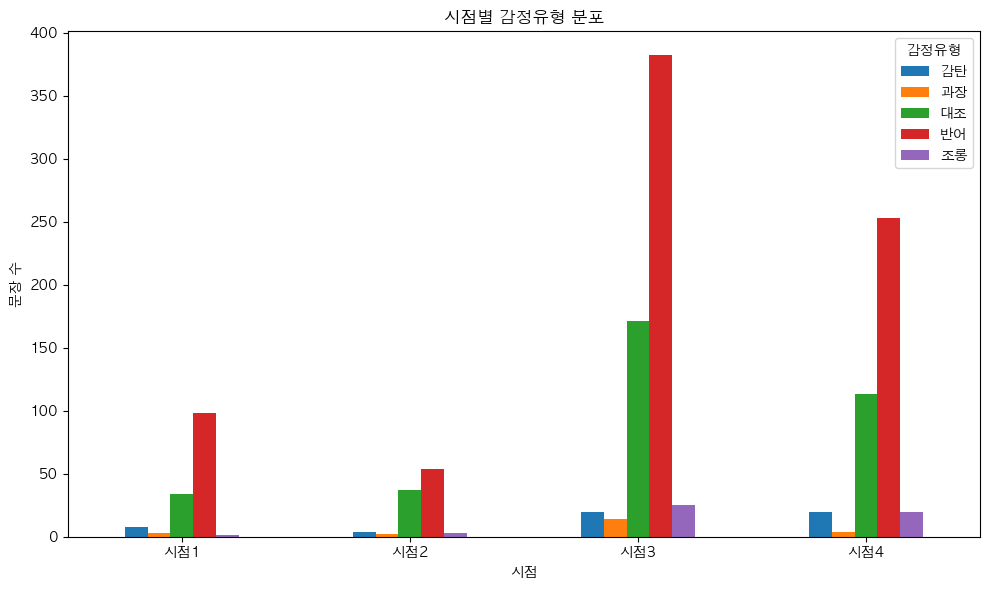

In [47]:
from collections import Counter
import matplotlib.pyplot as plt

path = "/Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/태평천하_감정유형태깅_최종.csv"
df = pd.read_csv(path)

# 시점 범위 (책 읽고 직접 추출 - 시점별로 )
slices = {
    "시점1": (1, 549),
    "시점2": (550, 1100),
    "시점3": (1101, 3654),
    "시점4": (3655, df["문장번호"].max())
}

results = []

# 시점별 감정유형 카운트
for stage, (start, end) in slices.items():
    sub = df[(df["문장번호"] >= start) & (df["문장번호"] <= end)]
    emotions = []
    for val in sub["감정유형"].dropna():
        emotions += [e.strip() for e in val.split(",") if e.strip()]
    count = Counter(emotions)
    for emotion, freq in count.items():
        results.append({"시점": stage, "감정유형": emotion, "빈도수": freq})

# 데이터프레임으로 정리
summary = pd.DataFrame(results)
pivot = summary.pivot(index="감정유형", columns="시점", values="빈도수").fillna(0).astype(int)

# 저장
pivot_path = "/Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/태평천하_시점별_감정유형분포.csv"
pivot.to_csv(pivot_path, encoding="utf-8-sig")

import matplotlib as mpl
mpl.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 시각화
pivot.T.plot(kind="bar", figsize=(10, 6), title="시점별 감정유형 분포")
plt.xlabel("시점")
plt.ylabel("문장 수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("/Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/시점별_감정유형_분포그래프.png")

print("시점별 감정유형 분석 완료")
print("결과 CSV 저장:", pivot_path)


시점별 문장의 양이 다르기 때문에 비율로 계산해봐야 한다

 시점별 감정유형 비율 분석 완료
 저장: /Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/태평천하_시점별_감정유형비율.csv


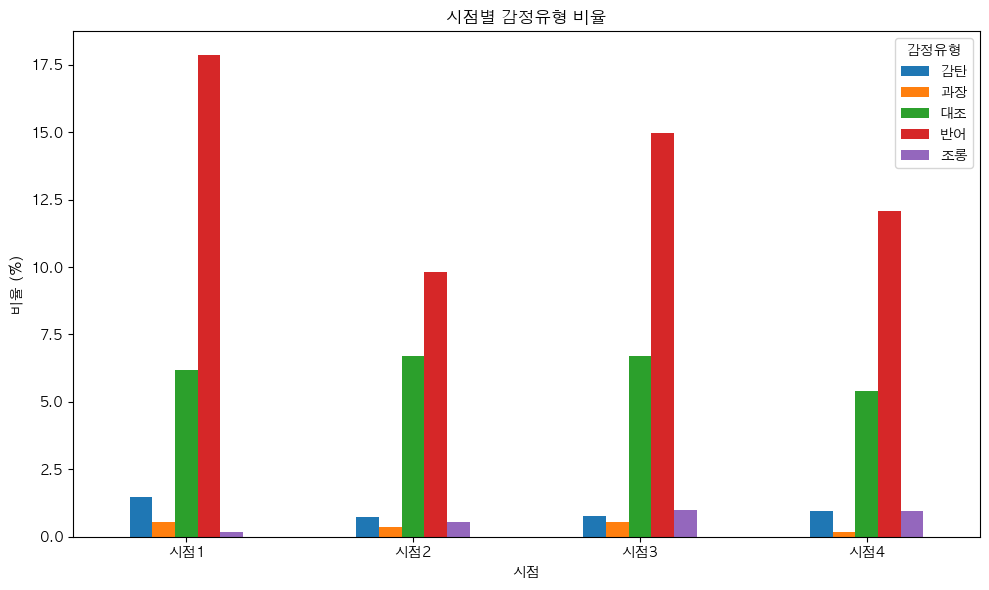

In [49]:
path = "/Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/태평천하_감정유형태깅_최종.csv"
df = pd.read_csv(path)

# 시점 범위 정의
slices = {
    "시점1": (1, 549),
    "시점2": (550, 1100),
    "시점3": (1101, 3654),
    "시점4": (3655, df["문장번호"].max())
}

# 감정유형 카운트 → 비율 변환
results = []

for stage, (start, end) in slices.items():
    sub = df[(df["문장번호"] >= start) & (df["문장번호"] <= end)]
    total = len(sub)
    emotions = []
    for val in sub["감정유형"].dropna():
        emotions += [e.strip() for e in val.split(",") if e.strip()]
    count = Counter(emotions)
    for emotion, freq in count.items():
        percent = round(freq / total * 100, 2)
        results.append({"시점": stage, "감정유형": emotion, "비율(%)": percent})

# 데이터 정리
summary = pd.DataFrame(results)
pivot = summary.pivot(index="감정유형", columns="시점", values="비율(%)").fillna(0)

# 저장
pivot_path = "/Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/태평천하_시점별_감정유형비율.csv"
pivot.to_csv(pivot_path, encoding="utf-8-sig")

# 시각화
pivot.T.plot(kind="bar", figsize=(10, 6), title="시점별 감정유형 비율")
plt.xlabel("시점")
plt.ylabel("비율 (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("/Users/jeonghaheon/Documents/GitHub/taepyungcheonha-sentiment_text_analytics/data/시점별_감정유형_비율그래프.png")

print(" 시점별 감정유형 비율 분석 완료")
print(" 저장:", pivot_path)
